# Classification--> Decision Tree

### Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('movies.csv')

In [ ]:
df.head()

,Movie,Budget,Celebrities,Class
0,The 400 Blows,100000000,2.0,Box Office Burst
1,La Haine,210000000,3.0,Box Office Burst
2,The Godfather,250000000,4.0,Box Office Burst
3,The Godfather: Part II,350000000,2.0,Box Office Burst
4,Man Bites Dog,400600000,4.0,Box Office Burst


In [ ]:
df.columns

Index(['Movie', 'Budget', 'Celebrities', 'Class'], dtype='object')

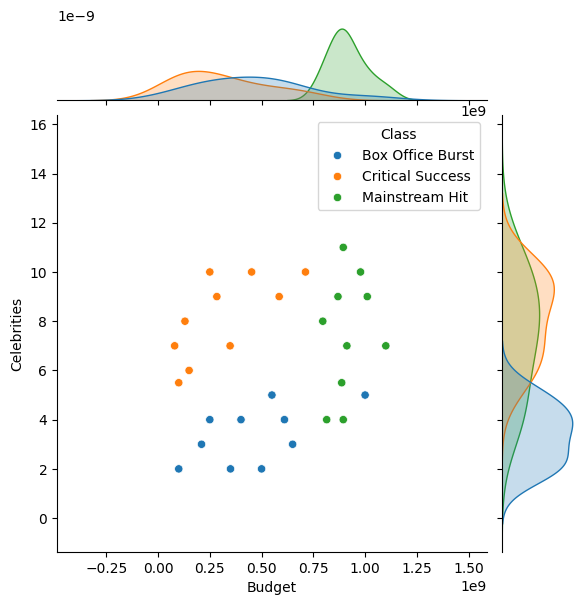

In [ ]:
sns.jointplot(x='Budget', y='Celebrities', hue='Class', data = df);

In [ ]:
x = df[['Budget','Celebrities']]   # Input data
y = df['Class']    # Output data

# Building the Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x,y)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(x)

In [ ]:
clf.predict([[560000,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Box Office Burst'], dtype=object)

In [ ]:
clf.predict([[560000,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Critical Success'], dtype=object)

# Using Another Dataset

In [ ]:
df = pd.read_csv('banknotes.csv')

In [ ]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
x = df.drop('Class', axis=1)
y = df['Class']

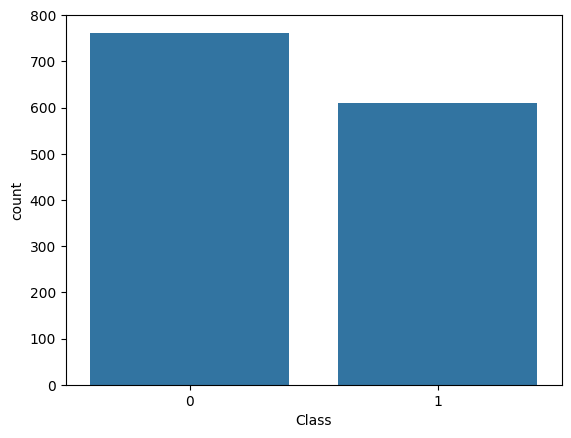

In [ ]:
sns.countplot(x=y);

In [ ]:
y.value_counts()

0    762
1    610
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
data = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
data

,Actual,Predicted
223,0,0
1059,1,1
111,0,0
749,0,0
200,0,0
...,...,...
193,0,0
255,0,0
741,0,0
318,0,0


## Confusion Matrix

[[192   4]
 [  2 145]]


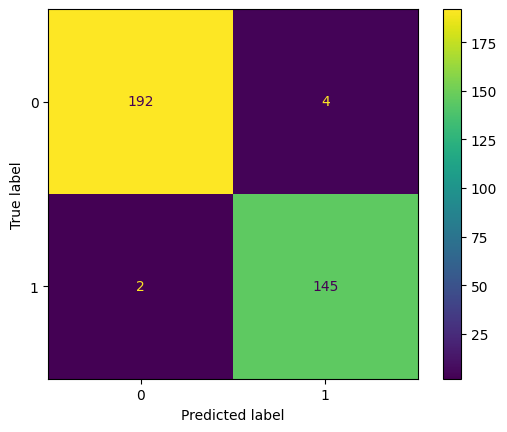

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

## Classification Report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       196
           1       0.97      0.99      0.98       147

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9825072886297376

In [ ]:
## Plotting the Tree

In [ ]:
from sklearn.tree import plot_tree

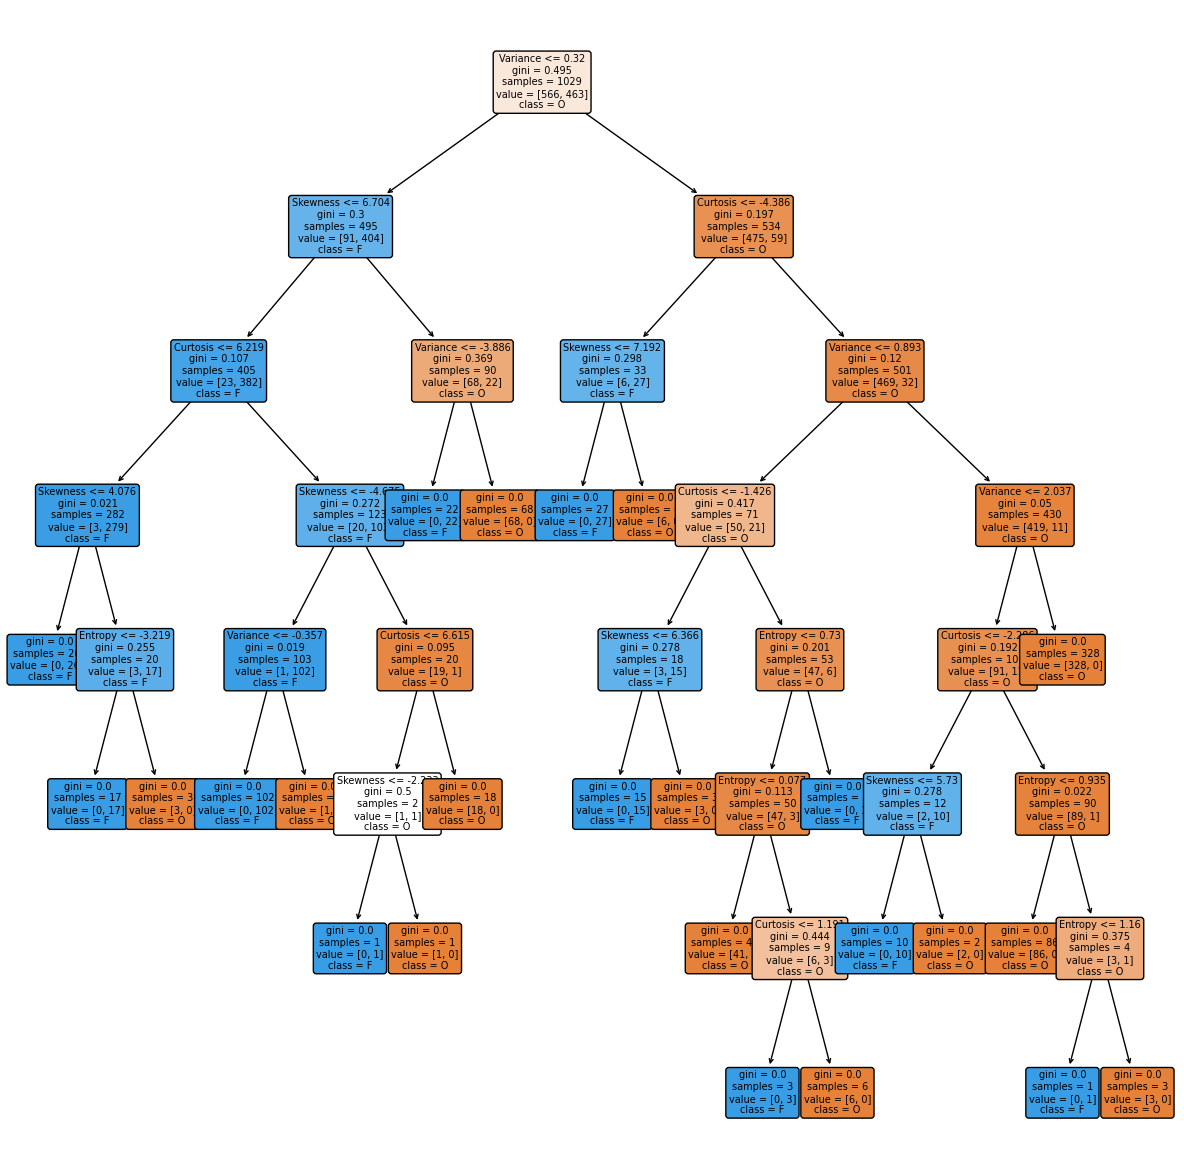

In [ ]:
plt.figure(figsize=(15,15))
plot_tree(clf, fontsize=7, rounded= True, filled=True, feature_names=x.columns, class_names= ['O','F']);

In [ ]:
imp = clf.feature_importances_

In [ ]:
imp

array([0.59247332, 0.23856591, 0.14202561, 0.02693516])

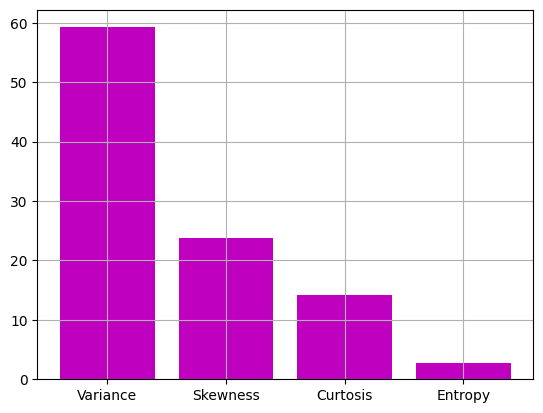

In [ ]:
plt.bar(x.columns,imp*100, color='m')
plt.grid()

In [ ]:
new1 = [[3.62160,8.66610,-2.8073,-0.44699]]
clf.predict(new1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
df = pd.read_csv('banknotes.csv')

In [ ]:
df.head(3)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


In [ ]:
import warnings
warnings.filterwarnings('ignore')

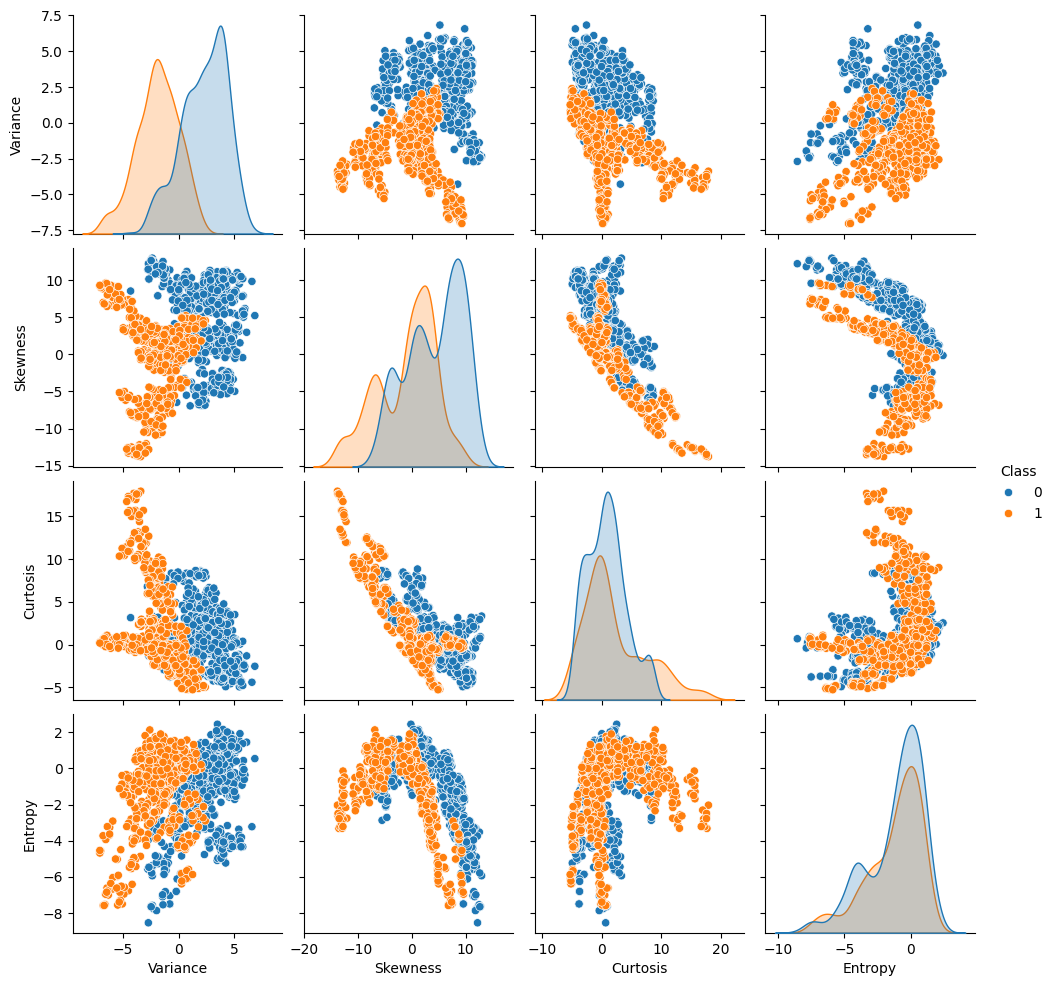

In [ ]:
sns.pairplot(df, hue = 'Class')

In [ ]:
x = df.drop('Class', axis= 1)
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
x_train.shape

(1029, 4)

In [ ]:
x_test.shape

(343, 4)

# Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10, random_state=0)

In [ ]:
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, classification_report
accuracy_score(y_test, y_pred)

0.9941690962099126

In [ ]:
confusion_matrix(y_test, y_pred)

array([[192,   1],
       [  1, 149]])

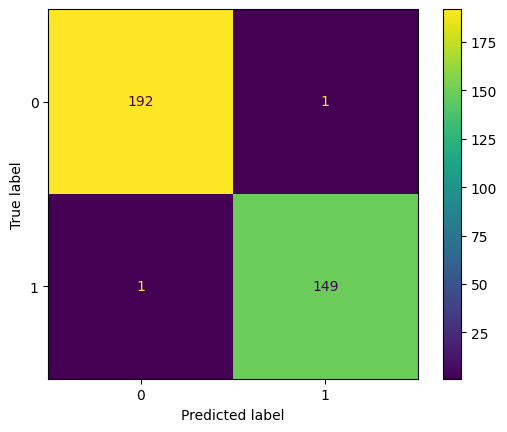

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       193
           1       0.99      0.99      0.99       150

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343

